### Name: Ambreen Abdul Raheem
### Teacher: Sir Sajid Majeed
### Subject: Machine Learning
### Program: Data Science with Artificial Intelligence
### Github:https://github.com/ambreenraheem?tab=overview&from=2024-09-01&to=2024-09-30
### Email: ambreen.a.raheem@outlook.com
### LinkedIn: https://www.linkedin.com/in/ambreen-abdul-raheem-122509300/

## Support Vector Regression (SVR)
Support Vector Regression is a powerful tool for regression tasks, especially when dealing with complex datasets. Its ability to handle non-linear relationships and robustness against outliers makes it a popular choice among data scientists and statisticians.

In [81]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [82]:
# Importing the dataset
df = pd.read_csv('Position_Salaries.csv')

In [83]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [84]:
df.shape

(10, 3)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [86]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [87]:
df.sample(2)

,Position,Level,Salary
8,C-level,9,500000
9,CEO,10,1000000


In [88]:
# find no of unique position and their names and presence of position in each category
print(df['Position'].unique())
print(df['Position'].nunique())
print(df['Position'].value_counts())

['Business Analyst' 'Junior Consultant' 'Senior Consultant' 'Manager'
 'Country Manager' 'Region Manager' 'Partner' 'Senior Partner' 'C-level'
 'CEO']
10
Position
Business Analyst     1
Junior Consultant    1
Senior Consultant    1
Manager              1
Country Manager      1
Region Manager       1
Partner              1
Senior Partner       1
C-level              1
CEO                  1
Name: count, dtype: int64


In [89]:
X = df.drop(columns=['Position','Salary'])

In [90]:
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [91]:
y = df["Salary"]

In [92]:
y=np.array(y).reshape(-1,1) # it is for reshaping to makw it in array
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [94]:
X_train

,Level
4,5
9,10
1,2
6,7
7,8
3,4
0,1
5,6


In [95]:
X_test

,Level
2,3
8,9


In [96]:
y_test

array([[ 60000],
       [500000]])

In [97]:
y_train

array([[ 110000],
       [1000000],
       [  50000],
       [ 200000],
       [ 300000],
       [  80000],
       [  45000],
       [ 150000]])

In [98]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(X_train)
x_test = sc_X.transform(X_test)

In [99]:
x_train

array([[-0.13271219],
       [ 1.63678363],
       [-1.19440968],
       [ 0.57508614],
       [ 0.92898531],
       [-0.48661135],
       [-1.54830884],
       [ 0.22118698]])

In [100]:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_train

array([[-0.44345056],
       [ 2.54931528],
       [-0.64521005],
       [-0.14081131],
       [ 0.19545451],
       [-0.5443303 ],
       [-0.66202334],
       [-0.30894423]])

In [101]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
svr_rbf.fit(x_train, y_train)

c:\Users\sc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, gamma=0.1)

In [102]:
y_pred = svr_rbf.predict(x_test)

In [103]:
y_pred

array([-0.56744557,  1.39286803])

In [ ]:
# Predicting a new result with another way
# y_pred1 = svr_rbf.predict([[4]])

c:\Users\sc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


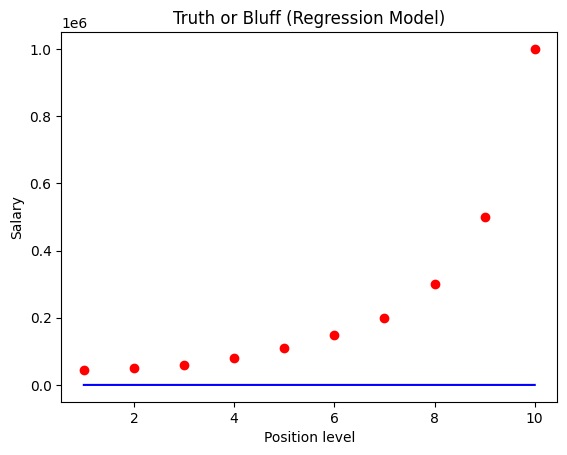

In [106]:
# Visualising the Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, svr_rbf.predict(X), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [107]:
len(y_pred)

2

In [111]:
from sklearn.metrics import mean_squared_error, r2_score

print('MSE = ', mean_squared_error(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 = ', r2_score(y_test, y_pred))

MSE =  126799337613.85065
RMSE =  356088.9462112671
R2 =  -1.6198210250795588
